In [2]:
from REACTRL.task_script.utils import *
import matplotlib.patches as patches
# label_episode, label_middle=performance_model_succ_rate(current_time='5_31_22_48')
# label_episode, label_middle=performance_model_succ_rate(current_time='5_20_11_4')
# label_episode, label_middle=performance_model_succ_rate(current_time='6_3_13_39')

c:\Users\wun2\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\wun2\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\wun2\Anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Expert

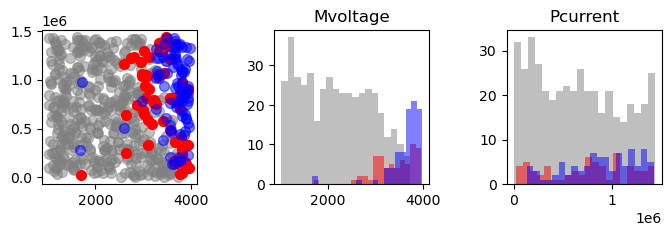

In [6]:
label_episode=pd.read_csv('label_episode_5_31_22_48_expert_64_87.csv')
label_middle=pd.read_csv('label_middle_5_31_22_48_expert_433.csv')
plt.figure(figsize=(8,2))
plt.subplot(1,3,1)
plt.scatter(label_middle['mvoltage'], label_middle['pcurrent']*1200, c='grey', s=50, alpha=0.5)
plt.scatter(label_episode[label_episode['expert']==1]['mvoltage'], label_episode[label_episode['expert']==1]['pcurrent']*1200, c='r', s=50)
plt.scatter(label_episode[label_episode['expert']==3]['mvoltage'], label_episode[label_episode['expert']==3]['pcurrent']*1200, c='blue', s=50, alpha=0.5)


plt.subplot(1,3,2)
plt.hist(label_middle['mvoltage'], bins=20, color='grey', alpha=0.5)
plt.hist(label_episode[label_episode['expert']==1]['mvoltage'], bins=20, color='r', alpha=0.5)
plt.hist(label_episode[label_episode['expert']==3]['mvoltage'], bins=20, color='blue', alpha=0.5)

plt.title('Mvoltage')

plt.subplot(1,3,3)
plt.hist(label_middle['pcurrent']*1200, bins=20, color='grey', alpha=0.5)
plt.hist(label_episode[label_episode['expert']==1]['pcurrent']*1200, bins=20, color='r', alpha=0.5)
plt.hist(label_episode[label_episode['expert']==3]['pcurrent']*1200, bins=20, color='blue', alpha=0.5)

plt.title('Pcurrent')

plt.subplots_adjust(wspace=0.5)

(-1.0, 1.0)

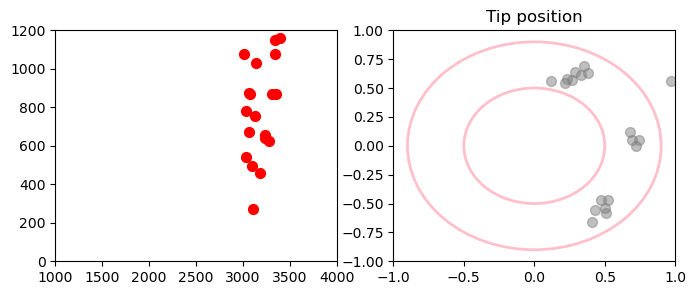

In [25]:
succ_aaa=label_episode[label_episode['expert']==1 & (label_episode['mvoltage']<3400) & (label_episode['mvoltage']>3000)]
num_subplots=2
plt.figure(figsize=(8,3))
plt.subplot(1,num_subplots,1)
plt.scatter(succ_aaa['mvoltage'], succ_aaa['pcurrent'], c='r', s=50)
plt.xlim(1000, 4000)
plt.ylim(0, 1200)
plt.subplot(1,num_subplots,2)
plt.scatter(succ_aaa['tip_x'], succ_aaa['tip_y'], c='grey', s=50, alpha=0.5)
center_x=0
center_y=0
plt.gca().add_patch(patches.Circle((center_x, center_y), 0.5, color='pink', linewidth=2, fill=False))
plt.gca().add_patch(patches.Circle((center_x, center_y), 0.9, color='pink', linewidth=2, fill=False))
plt.title('Tip position')
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Image classification

In [7]:
label_episode=pd.read_csv('label_episode_5_31_22_48_expert_64_87.csv')
label_middle=pd.read_csv('label_middle_5_31_22_48_expert_433.csv')
plt.figure(figsize=(8,2))
plt.subplot(1,3,1)
plt.scatter(label_middle['mvoltage']*4000, label_middle['pcurrent']*1200, c='grey', s=50, alpha=0.5)
plt.scatter(label_episode[label_episode['done_diss']=='True']['mvoltage']*4000, label_episode[label_episode['done_diss']=='True']['pcurrent']*1200, c='r', s=50)
plt.scatter(label_episode[label_episode['done_diss']=='False']['mvoltage']*4000, label_episode[label_episode['done_diss']=='False']['pcurrent']*1200, c='blue', s=50, alpha=0.5)


plt.subplot(1,3,2)
plt.hist(label_middle['mvoltage']*4000, bins=20, color='grey', alpha=0.5)
plt.hist(label_episode[label_episode['done_diss']=='True']['mvoltage']*4000, bins=20, color='r', alpha=0.5)
plt.hist(label_episode[label_episode['done_diss']=='False']['mvoltage']*4000, bins=20, color='blue', alpha=0.5)

plt.title('Mvoltage')

plt.subplot(1,3,3)
plt.hist(label_middle['pcurrent']*1200, bins=20, color='grey', alpha=0.5)
plt.hist(label_episode[label_episode['done_diss']=='True']['pcurrent']*1200, bins=20, color='r', alpha=0.5)
plt.hist(label_episode[label_episode['done_diss']=='False']['pcurrent']*1200, bins=20, color='blue', alpha=0.5)

plt.title('Pcurrent')

plt.subplots_adjust(wspace=0.5)

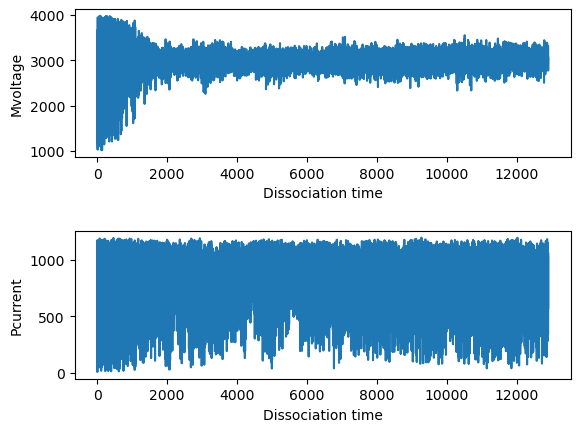

In [26]:
method='sac'
folder_name='%s_test_succ_expert_0.001_0.99_0.05' % method

data_action=pd.read_csv('%s/%s_action.txt' % (folder_name, method), sep=',|:|\t', engine='python', header=None)

plt.subplot(2,1,1)
plt.plot([i for i in range(len(data_action))], data_action[1]*4000)
plt.xlabel('Dissociation time')
plt.ylabel('Mvoltage')
plt.subplot(2,1,2)
plt.plot([i for i in range(len(data_action))], data_action[3]*1200)
plt.xlabel('Dissociation time')
plt.ylabel('Pcurrent')

plt.subplots_adjust(hspace=0.5)



C:\Users\wun2\AppData\Local\Temp\ipykernel_11944\531368997.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data=pd.read_csv('%s/%s_reward.txt' % (folder_name, method), sep=',|:', header=None)


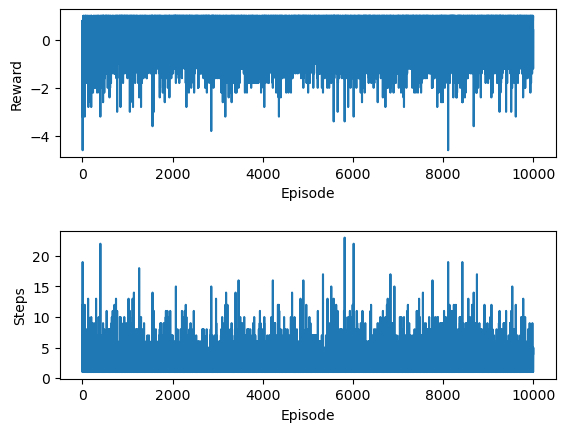

In [30]:
method='sac'
folder_name='%s_test_succ_expert_0.001_0.99_0.05' % method
data=pd.read_csv('%s/%s_reward.txt' % (folder_name, method), sep=',|:', header=None)
plt.subplot(2,1,1)
plt.plot([j for j in range(len(data))], data[1])
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.subplot(2,1,2)
plt.plot([j for j in range(len(data))], data[3])
plt.xlabel('Episode')
plt.ylabel('Steps')

plt.subplots_adjust(hspace=0.5)

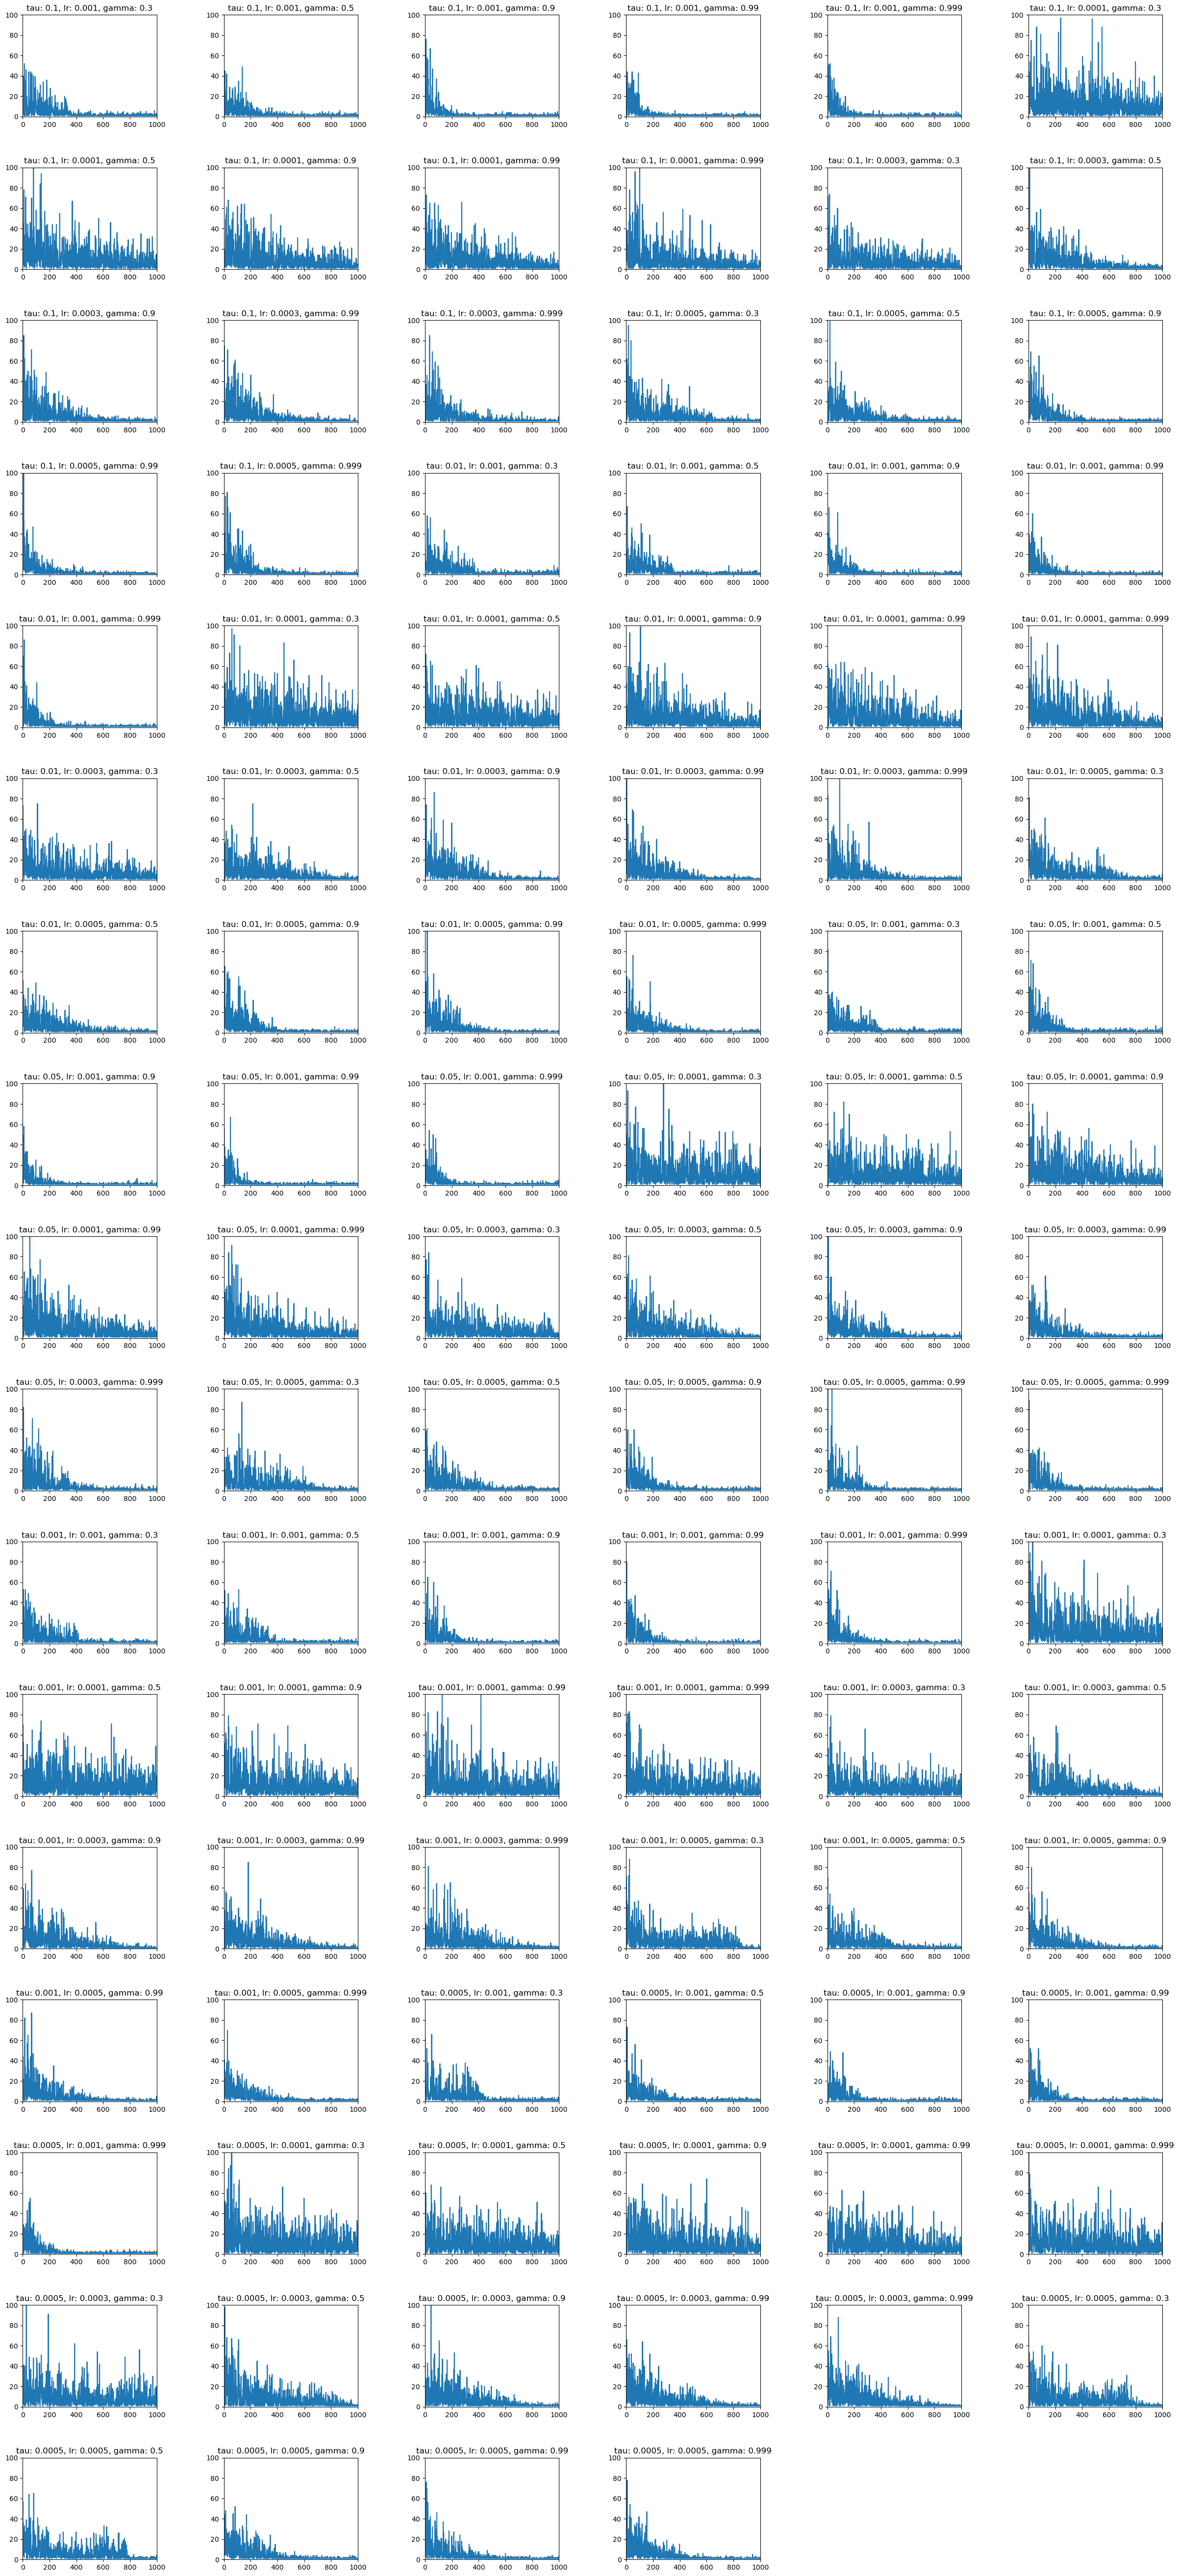

In [769]:
import os


plt.figure(figsize=(30,120))
folder_name = 'toy_reward_test'
tau_list=[0.1, 0.01, 0.05, 0.001, 0.0005]
lr_list=[0.001, 0.0001, 0.0003, 0.0005]
gamma_list=[0.3, 0.5, 0.9, 0.99, 0.999]
for i, tau in enumerate(tau_list):
    for j, lr in enumerate(lr_list):
        for k, gamma in enumerate(gamma_list):
            if os.path.exists('%s/sac_reward_%s_%s_%s.txt' % (folder_name, tau, lr, gamma)):
                data=pd.read_csv('%s/sac_reward_%s_%s_%s.txt' % (folder_name, tau, lr, gamma), sep=',|:', engine='python', header=None)
                plt.subplot(30, 6, i*len(lr_list)*len(gamma_list)+j*len(gamma_list)+k+1)
                plt.plot([j for j in range(len(data))], data[3])
                plt.title('tau: %s, lr: %s, gamma: %s' % (tau, lr, gamma))
                plt.xlim(0, 1000)
                plt.ylim(0, 100)


plt.subplots_adjust(wspace=0.5, hspace=0.5)